<a href="https://colab.research.google.com/github/GHes31415/OT/blob/main/parameter_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from ipywidgets import *

In [ ]:

n = 150

sig0 = torch.tensor([[40,10],[10,20]],dtype = torch.float32)
D0,U0 = torch.linalg.eig(sig0)
print(D0, U0)
sqrt_sig0 = torch.mm(torch.mm(U0,torch.diag(D0**(0.5))),torch.linalg.inv(U0)).float()
sig1 = torch.tensor([[5,2],[2,4]],dtype = torch.float32)
D1,U1 = torch.linalg.eig(sig1)
sqrt_sig1 = torch.mm(torch.mm(U1,torch.diag(D1**(0.5))),torch.linalg.inv(U1)).float()
print(sqrt_sig1)
t = torch.linspace(0,1,n).reshape(n,1,1)

sqrt_gamma_t = sqrt_sig0*(1-t) + sqrt_sig1*t
print(torch.mm(sqrt_gamma_t[-1], sqrt_gamma_t[-1]))
gamma_t = torch.bmm(sqrt_gamma_t,sqrt_gamma_t)

product_1 = torch.mm(sqrt_sig0,torch.mm(sig1,sqrt_sig0))
D010,U010 = torch.linalg.eig(product_1)
sqrt_010 = torch.mm(torch.mm(U010,torch.diag(D010**(0.5))),torch.linalg.inv(U010)).float()
sig_t = torch.bmm((1-t)*sig0 + sqrt_010*t,(1-t)*sig0 + sqrt_010*t)
sqrt_sig0_inv = torch.linalg.inv(sqrt_sig0)*torch.ones(n,1,1)
sig_t = torch.bmm(torch.bmm(sqrt_sig0_inv,sig_t),sqrt_sig0_inv)

D2,U2 = torch.linalg.eig(sig_t[1])
sigt1 = torch.mm(torch.mm(U2,torch.diag(D2**(0.5))),torch.linalg.inv(U2)).float()
diff2 = (sigt1-sqrt_sig0)*n
print(diff2)

diff1 = (sqrt_gamma_t[1]-sqrt_gamma_t[0])*n
print(diff1)

normal_0 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= sig0)
normal_1 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= sig1)

tensor([44.1421+0.j, 15.8579+0.j]) tensor([[ 0.9239+0.j, -0.3827+0.j],
        [ 0.3827+0.j,  0.9239+0.j]])
tensor([[2.1828, 0.4851],
        [0.4851, 1.9403]])
tensor([[5.0000, 2.0000],
        [2.0000, 4.0000]])
tensor([[-4.0958, -0.4519],
        [-0.4519, -2.4523]])
tensor([[-4.0986, -0.4591],
        [-0.4591, -2.4480]])


In [ ]:
# Check for commutativity
print(torch.mm(sig0,sig1),torch.mm(sig1,sig0))

tensor([[220., 120.],
        [ 90., 100.]]) tensor([[220.,  90.],
        [120., 100.]])


In [ ]:
x,y = torch.linspace(-20,20,1000),torch.linspace(-20,20,1000)
X,Y = torch.meshgrid(x,y)
pos = torch.dstack((X,Y))

In [ ]:
def plot_diff_std(i = 0):

    gauss_1 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= gamma_t[int(i)])
    evaluation1 = torch.exp(gauss_1.log_prob(pos).reshape(X.size()))
    gauss_2 = torch.distributions.MultivariateNormal(loc = torch.tensor([0,0]),covariance_matrix= sig_t[int(i)])
    evaluation2 = torch.exp(gauss_2.log_prob(pos).reshape(X.size()))
    err = torch.abs(evaluation1-evaluation2)
    fig = plt.figure()
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation1.detach().numpy(), cmap = 'hot')
    # plt.contour(X.detach().numpy(),Y.detach().numpy(),evaluation2.detach().numpy())
    plt.contourf(X.detach().numpy(),Y.detach().numpy(),err.detach().numpy())
    plt.show()




In [ ]:
interact(plot_diff_std,i = (0,n-1,1));

interactive(children=(IntSlider(value=0, description='i', max=149), Output()), _dom_classes=('widget-interact'…

In [ ]:
error_t = torch.linalg.norm(gamma_t-sig_t,dim =(1,2))


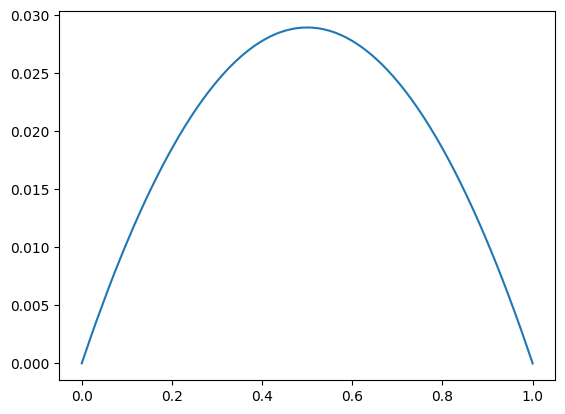

In [ ]:
plt.plot(np.linspace(0,1,n),error_t.detach().numpy())